# Join models to Observations
* Join CORDEX to Observations

In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('cordex_output_path', cordex_output_path)
print('temp_output_path', temp_output_path)
print('cordex_dict_raw', cordex_dict_raw)

cordex_output_path ..\data\cordex\output
temp_output_path ..\data\observations\temp\output
cordex_dict_raw {0: 'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63_v2', 1: 'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_DMI-HIRHAM5_v2', 2: 'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_SMHI-RCA4_v1', 3: 'ICHEC-EC-EARTH_historical_r12i1p1_SMHI-RCA4_v1', 4: 'ICHEC-EC-EARTH_historical_r3i1p1_DMI-HIRHAM5_v2', 5: 'IPSL-IPSL-CM5A-MR_historical_r1i1p1_SMHI-RCA4_v1', 6: 'MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-6_v1', 7: 'MOHC-HadGEM2-ES_historical_r1i1p1_SMHI-RCA4_v1', 8: 'MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1_v1', 9: 'MPI-M-MPI-ESM-LR_historical_r1i1p1_DMI-HIRHAM5_v1', 10: 'MPI-M-MPI-ESM-LR_historical_r1i1p1_ICTP-RegCM4-6_v1', 11: 'MPI-M-MPI-ESM-LR_historical_r1i1p1_SMHI-RCA4_v1a', 12: 'MPI-M-MPI-ESM-LR_historical_r3i1p1_GERICS-REMO2015_v1', 13: 'NCC-NorESM1-M_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1_v1', 14: 'NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3', 15: 'NC

#### Load observations

In [4]:
df_obs_3_jja = load_csv2df('temp_obs_3_jja.csv', temp_output_path, freq_index='3H')

# the observations time series is named 17
df_obs_3_jja = df_obs_3_jja.rename({'temp':17}, axis=1)
df_obs_3_jja.head()

,17
date,
1979-06-01 00:00:00,12.933333
1979-06-01 03:00:00,12.233333
1979-06-01 06:00:00,11.933333
1979-06-01 09:00:00,15.533333
1979-06-01 12:00:00,18.900000


#### Load CORDEX Models

In [5]:
all_models_jja = load_csv2df('temp_CORDEX_1979_2005_jja.csv', cordex_output_path, freq_index='3H')
all_models_jja.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,,
1979-06-01 00:00:00,13.419122,14.471643,14.328729,13.729150,13.672754,10.644250,12.337183,10.969507,16.211725,19.048730,14.766718,16.977441,12.107019,14.522089,15.005762,15.043542,10.745996
1979-06-01 03:00:00,12.501764,14.402551,12.254663,14.001581,13.041925,9.791833,11.918695,10.839319,15.977960,18.184839,15.022180,16.634790,11.559991,14.790338,14.716455,14.938684,11.698389
1979-06-01 06:00:00,11.911584,13.907617,11.871179,13.747766,12.438898,9.561914,12.052179,10.406824,16.152734,17.723444,13.791528,16.666528,11.469415,15.098444,14.315088,15.044244,13.068018
1979-06-01 09:00:00,15.474115,17.524805,18.803857,15.239832,16.544214,12.460474,14.724603,15.226221,22.113336,21.220728,16.057153,18.326074,15.713953,17.690302,15.798486,15.259332,16.350977
1979-06-01 12:00:00,17.844873,19.986719,24.058984,16.716211,21.106104,13.730859,18.498956,18.569238,27.650629,25.784845,17.785272,20.640039,18.421106,20.991083,21.013086,16.919702,19.115137


### Joining the models data and observations

In [6]:
df_all_jja = all_models_jja.join(df_obs_3_jja, on='date', how='inner')
df_all_jja.dropna(subset=[17], axis=0, inplace=True)
df_all_jja = df_all_jja.asfreq('3H')
df_all_jja.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
date,,,,,,,,,,,,,,,,,,
1979-06-01 00:00:00,13.419122,14.471643,14.328729,13.729150,13.672754,10.644250,12.337183,10.969507,16.211725,19.048730,14.766718,16.977441,12.107019,14.522089,15.005762,15.043542,10.745996,12.933333
1979-06-01 03:00:00,12.501764,14.402551,12.254663,14.001581,13.041925,9.791833,11.918695,10.839319,15.977960,18.184839,15.022180,16.634790,11.559991,14.790338,14.716455,14.938684,11.698389,12.233333
1979-06-01 06:00:00,11.911584,13.907617,11.871179,13.747766,12.438898,9.561914,12.052179,10.406824,16.152734,17.723444,13.791528,16.666528,11.469415,15.098444,14.315088,15.044244,13.068018,11.933333
1979-06-01 09:00:00,15.474115,17.524805,18.803857,15.239832,16.544214,12.460474,14.724603,15.226221,22.113336,21.220728,16.057153,18.326074,15.713953,17.690302,15.798486,15.259332,16.350977,15.533333
1979-06-01 12:00:00,17.844873,19.986719,24.058984,16.716211,21.106104,13.730859,18.498956,18.569238,27.650629,25.784845,17.785272,20.640039,18.421106,20.991083,21.013086,16.919702,19.115137,18.900000


#### Save and load

In [7]:
save_df2csv(df_all_jja, 'cordex_join_obs_jja.csv', cordex_output_path, index=True)

In [8]:
df_all_jja_ = load_csv2df('cordex_join_obs_jja.csv', cordex_output_path, freq_index='3H')
assert compare_saved_loaded_df(df_all_jja_, df_all_jja)

In [9]:
mean_hourly = df_all_jja.groupby(df_all_jja.index.time).mean()
mean_hourly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
00:00:00,16.580253,16.955157,15.949089,15.921291,17.766131,15.751545,16.683249,15.194307,16.928538,18.587653,18.245850,17.441218,17.856119,16.966381,18.037449,18.219786,17.361769,19.753331
03:00:00,15.650897,16.252994,15.118905,15.051568,16.992205,14.973248,16.028100,14.300699,16.478054,17.822568,17.525547,16.581736,17.111994,16.435621,17.306846,17.463975,16.551596,18.895598
06:00:00,15.254064,15.748060,14.746570,14.579645,16.401078,14.623936,15.552962,13.945072,16.211097,17.267193,17.003245,16.140285,16.577432,16.165811,16.793257,16.943114,16.266580,18.356371
09:00:00,20.380696,18.930167,19.392411,19.716078,19.785181,19.805649,18.788878,18.670145,21.615778,20.473517,20.390677,21.151066,20.753713,22.091954,20.216150,21.700247,21.355300,20.518839
12:00:00,24.750813,23.085859,23.611550,24.499631,24.449162,24.752476,22.105544,22.466565,26.069767,24.747205,24.067370,25.931965,26.438445,26.434391,24.728297,27.784190,25.701283,24.184023
15:00:00,25.852965,24.317816,24.858336,25.814836,25.782208,26.008472,22.919373,23.580845,26.194448,25.999431,25.065198,27.242675,27.966676,26.044419,25.883124,29.190004,26.722179,25.913117
18:00:00,22.615275,22.034147,21.845597,22.403420,23.322696,22.442110,21.072393,21.070195,22.259485,23.820570,22.951080,23.876390,24.894852,22.525640,23.383550,25.630088,23.358810,24.674856
21:00:00,18.232309,18.437002,17.484597,17.533865,19.381179,17.405356,17.777800,16.927056,17.844660,20.121832,19.364609,19.070458,19.628587,18.056673,19.579112,20.015737,18.866499,21.470768


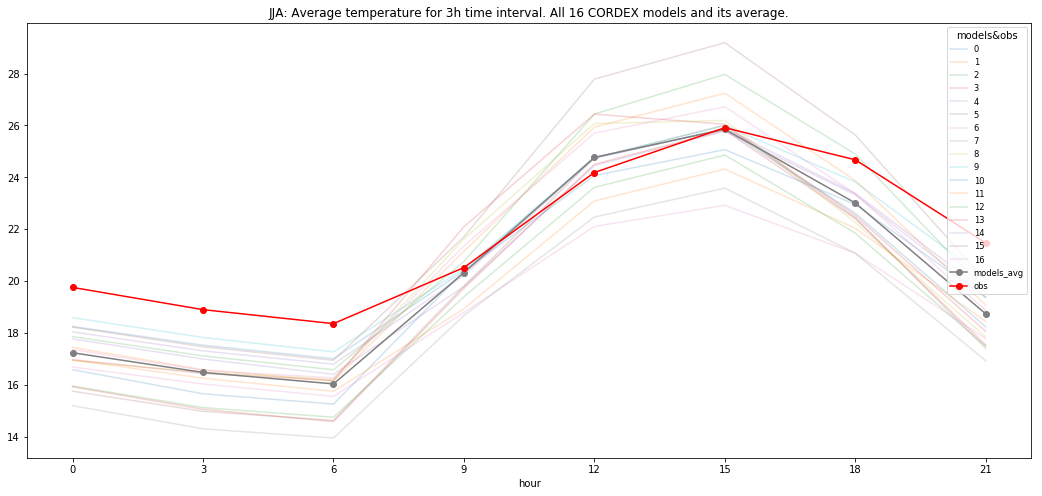

In [10]:
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'

_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("JJA: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_jja', output_dir = plots_output_path)

* It seems that the models have a hard time to simulate the temperature during the periods without the sun (<6h - >18h).
* In that period the system's inertia is badly simulated.
* When there is sun (>6h - <18h) this active source of heat seems to dominate the physical process and is better considered in the model.
* Is this visible for the corresponding periods for the other seasons? In the winter this should happen for a shorter period. 

### Join all seasons

### 'DJF' 

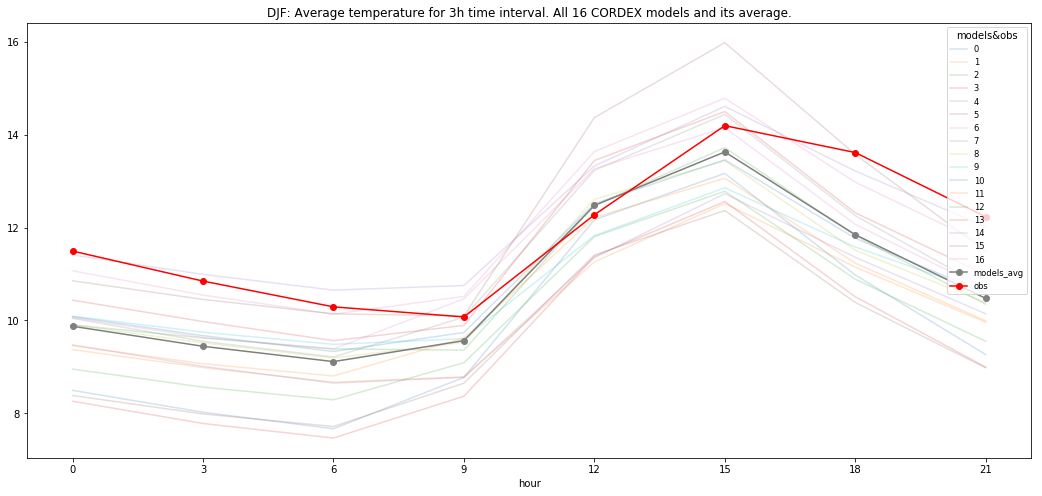

In [11]:
# load observations
df_obs_3_djf = load_csv2df('temp_obs_3_djf.csv', temp_output_path, freq_index='3H')
df_obs_3_djf = df_obs_3_djf.rename({'temp':17}, axis=1)
#load models
all_models_djf = load_csv2df('temp_CORDEX_1979_2005_djf.csv', cordex_output_path, freq_index='3H')
# join
df_all_djf = all_models_djf.join(df_obs_3_djf, on='date', how='inner')
df_all_djf.dropna(subset=[17], axis=0, inplace=True)
df_all_djf = df_all_djf.asfreq('3H')
# save joined
save_df2csv(df_all_djf, 'cordex_join_obs_djf.csv', cordex_output_path, index=True)
# re-load
df_all_djf_ = load_csv2df('cordex_join_obs_djf.csv', cordex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_djf.groupby(df_all_djf.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("DJF: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_djf', output_dir = plots_output_path)

### 'MAM'

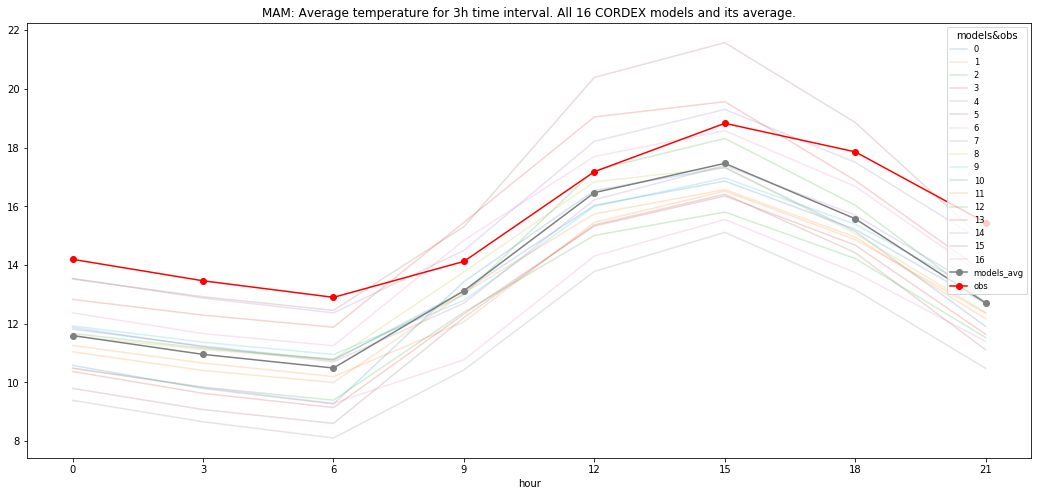

In [13]:
# load observations
df_obs_3_mam = load_csv2df('temp_obs_3_mam.csv', temp_output_path, freq_index='3H')
df_obs_3_mam = df_obs_3_mam.rename({'temp':17}, axis=1)
#load models
all_models_mam = load_csv2df('temp_CORDEX_1979_2005_mam.csv', cordex_output_path, freq_index='3H')
# join
df_all_mam = all_models_mam.join(df_obs_3_mam, on='date', how='inner')
df_all_mam.dropna(subset=[17], axis=0, inplace=True)
df_all_mam = df_all_mam.asfreq('3H')
# save joined
save_df2csv(df_all_mam, 'cordex_join_obs_mam.csv', cordex_output_path, index=True)
# re-load
df_all_mam_ = load_csv2df('cordex_join_obs_mam.csv', cordex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_mam.groupby(df_all_mam.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("MAM: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_mam', output_dir = plots_output_path)

### 'SON' 

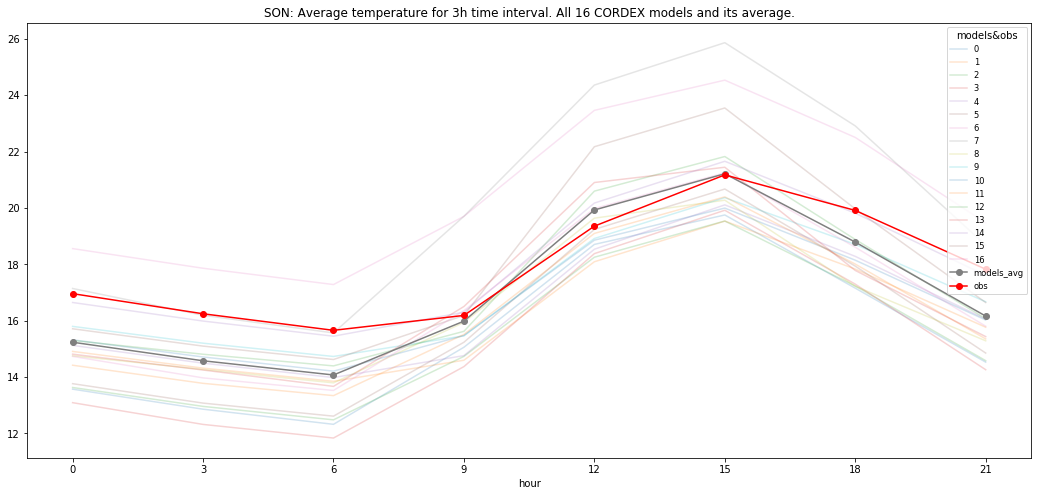

In [14]:
# load observations
df_obs_3_son = load_csv2df('temp_obs_3_son.csv', temp_output_path, freq_index='3H')
df_obs_3_son = df_obs_3_son.rename({'temp':17}, axis=1)
#load models
all_models_son = load_csv2df('temp_CORDEX_1979_2005_son.csv', cordex_output_path, freq_index='3H')
# join
df_all_son = all_models_son.join(df_obs_3_son, on='date', how='inner')
df_all_son.dropna(subset=[17], axis=0, inplace=True)
df_all_son = df_all_son.asfreq('3H')
# save joined
save_df2csv(df_all_son, 'cordex_join_obs_son.csv', cordex_output_path, index=True)
# re-load
df_all_son_ = load_csv2df('cordex_join_obs_son.csv', cordex_output_path, freq_index='3H')
# hourly mean
mean_hourly = df_all_son.groupby(df_all_son.index.time).mean()
mean_hourly.index =  list(map(lambda t: t.hour, mean_hourly.index))
mean_hourly.index.name = 'hour'
#plot
_ = mean_hourly.loc[:, list(range(17))].plot(figsize=(18,8), alpha=0.2)
_ = plt.plot(mean_hourly.mean(axis=1), '-o')
_ = plt.plot(mean_hourly.loc[:, 17], '-o', color='red')
_ = plt.legend(labels=list(mean_hourly.columns[:17])+['models_avg']+['obs'], title="models&obs",
                    loc=1, fontsize='small', fancybox=True)
_ = plt.title("SON: Average temperature for 3h time interval. All 16 CORDEX models and its average." )
_ = plt.xticks(list(range(0,22,3)))

save_plot(plt, 'obs_models_3h_by_h_son', output_dir = plots_output_path)